In [1]:
# IMporting Liberaries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("C:\\Users\\Sohayb\\Desktop\\toxic.csv")
data .head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
data.drop('id',axis=1,inplace=True)
# removing the column of id cause its useless

In [5]:
doc=list(data['comment_text'].values[:200])

In [6]:
doc

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
 '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on r

In [7]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sohayb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
doc

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
 '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on r

In [10]:
stdoc=', '.join(doc)

In [11]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim.summarization.textcleaner import split_sentences
all_stopwords_gensim = STOPWORDS
sw_list = {"not"}
all_stopwords_gensim = STOPWORDS.difference(sw_list)

doc_tokens = split_sentences(stdoc)
tokens_without_sw = [word for word in doc_tokens if not word in all_stopwords_gensim]

print(tokens_without_sw)

['Explanation', 'Why the edits made under my username Hardcore Metallica Fan were reverted?', "They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC.", "And please don't remove the template from the talk page since I'm retired now.89.205.38.27, D'aww!", "He matches this background colour I'm seemingly stuck with.", 'Thanks.', "(talk) 21:51, January 11, 2016 (UTC), Hey man, I'm really not trying to edit war.", "It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page.", 'He seems to care more about the formatting than the actual info., "', 'More', 'I can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc.', 'I can do that later on, if no-one else does first - if you have any preferences for f

In [12]:
import re

In [13]:
doc_cleaned=[re.sub(r'[^\w]+',' ',i) for i in tokens_without_sw]

In [14]:
tokens_without_sw[1],doc_cleaned[1]

('Why the edits made under my username Hardcore Metallica Fan were reverted?',
 'Why the edits made under my username Hardcore Metallica Fan were reverted ')

In [15]:
stdoc_cleaned=', '.join(doc_cleaned)
stdoc_cleaned

'Explanation, Why the edits made under my username Hardcore Metallica Fan were reverted , They weren t vandalisms just closure on some GAs after I voted at New York Dolls FAC , And please don t remove the template from the talk page since I m retired now 89 205 38 27 D aww , He matches this background colour I m seemingly stuck with , Thanks ,  talk 21 51 January 11 2016 UTC Hey man I m really not trying to edit war , It s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page , He seems to care more about the formatting than the actual info , More, I can t make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc , I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it y

In [16]:
#Creating a new Column that if a comment has any bad behavor or negative it carries valued 1 if not and its positive it will be valued by zero
data['Comment Behavor']=data['toxic']+data['severe_toxic']+data['obscene']+data['threat']+data['insult']+data['identity_hate']

In [17]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Comment Behavor
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [18]:
# Visualizing 
from wordcloud import WordCloud, STOPWORDS 

In [19]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(stdoc_cleaned)

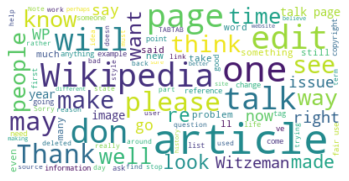

In [20]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
data['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [22]:
# creating a bag of words (bow)

In [23]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(doc_cleaned):
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(doc_cleaned).toarray())
    print(vectorizer.vocabulary_) 

In [24]:
 get_bag_of_words(doc_cleaned)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'explanation': 1140, 'why': 3235, 'the': 2947, 'edits': 1030, 'made': 1838, 'under': 3075, 'my': 2002, 'username': 3121, 'hardcore': 1415, 'metallica': 1929, 'fan': 1180, 'were': 3219, 'reverted': 2524, 'they': 2961, 'weren': 3220, 'vandalisms': 3132, 'just': 1682, 'closure': 678, 'on': 2116, 'some': 2716, 'gas': 1319, 'after': 202, 'voted': 3175, 'at': 368, 'new': 2048, 'york': 3315, 'dolls': 975, 'fac': 1153, 'and': 261, 'please': 2250, 'don': 978, 'remove': 2475, 'template': 2921, 'from': 1294, 'talk': 2900, 'page': 2164, 'since': 2668, 'retired': 2518, 'now': 2084, '89': 122, '205': 69, '38': 95, '27': 88, 'aww': 406, 'he': 1431, 'matches': 1878, 'this': 2969, 'background': 413, 'colour': 697, 'seemingly': 2605, 'stuck': 2829, 'with': 3260, 'thanks': 2943, '21': 72, '51': 107, 'january': 1650, '11': 13, '2016': 67, 'utc': 3126, 'hey': 1455, 'man': 1856, 'really':

In [25]:
# creating TFIDF Model 

In [26]:
data["comment_text"].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vectorizer=TfidfVectorizer()

In [29]:
doc_tfidf=vectorizer.fit_transform(doc_cleaned)

In [30]:
print(doc_tfidf)

  (0, 1140)	1.0
  (1, 2524)	0.3087148313676656
  (1, 3219)	0.2382940951847367
  (1, 1180)	0.3740668904065023
  (1, 1929)	0.3740668904065023
  (1, 1415)	0.3740668904065023
  (1, 3121)	0.31675630815321204
  (1, 2002)	0.20827945353889657
  (1, 3075)	0.2805973566151069
  (1, 1838)	0.2539494534104002
  (1, 1030)	0.2624274711540308
  (1, 2947)	0.09550181444008152
  (1, 3235)	0.25140424911437537
  (2, 1153)	0.30829603989156035
  (2, 975)	0.30829603989156035
  (2, 3315)	0.30829603989156035
  (2, 2048)	0.2246333491566161
  (2, 368)	0.16426986798355084
  (2, 3175)	0.290863425153448
  (2, 202)	0.21150373445424608
  (2, 1319)	0.30829603989156035
  (2, 2716)	0.19970456430275346
  (2, 2116)	0.1356151940151885
  (2, 678)	0.30829603989156035
  (2, 1682)	0.18402705521758692
  :	:
  (952, 2101)	0.08723573559662808
  (952, 1631)	0.09226196093664918
  (952, 1638)	0.09789566447768462
  (952, 2995)	0.07877571333348145
  (952, 2969)	0.1097446462647686
  (952, 2084)	0.1769139269649079
  (953, 1923)	0.57735026

In [31]:
len(doc_tfidf.A[0])

3333

In [32]:
len(doc_tfidf.A[1])

3333

In [33]:
comm_type=np.array(data['Comment Behavor'].values[:956])

In [34]:
comm_type.shape

(956,)

In [35]:
doc_tfidf.shape

(956, 3333)

In [36]:
# Splitting data as a preparation for Modeling 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = \
    train_test_split(doc_tfidf, comm_type, test_size=0.3, random_state=5)

In [38]:
# Scaling 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.A)
X_test  = scaler.transform(X_test.A)

In [41]:
toxic_detect_model = MultinomialNB().fit(X_train, y_train)
pred_test_MNB = toxic_detect_model.predict(X_test)

In [42]:
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print(acc_MNB)

0.8780487804878049


In [43]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc74c26e6c8>)

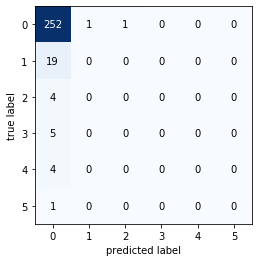

In [44]:
plot_confusion_matrix(confusion_matrix(y_test, pred_test_MNB))

In [45]:
from sklearn.linear_model import SGDClassifier
toxic_detect_model = SGDClassifier().fit(X_train, y_train)
pred_test_MNB = toxic_detect_model.predict(X_test)

In [46]:
acc_MNB = accuracy_score(y_test, pred_test_MNB)
print(acc_MNB)

0.8606271777003485


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc74c2ad788>)

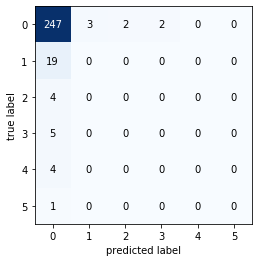

In [47]:
plot_confusion_matrix(confusion_matrix(y_test, pred_test_MNB))